# **핵심만 요약한 통계와 머신러닝 파이썬 코드북 개정1판**
- ⓒ2023 AlgoBoni all rights reserved.
- 본 컨텐츠의 저작권은 알고보니에 있습니다. 저작권법에 의해 보호를 받는 저작물이므로 무단 전재와 무단 복제를 금합니다.
- 본 컨텐츠의 종이책은 [교보문고](https://product.kyobobook.co.kr/detail/S000209591909), [예스24](https://www.yes24.com/Product/Goods/122661688), [알라딘](https://www.aladin.co.kr/shop/wproduct.aspx?ISBN=K262935029&start=pnaver_02)에서 구매할 수 있습니다. 종이책에서는 아래 개념 및 코드에 대한 설명과 연습문제를 제공합니다.

# 8. 회귀 분석

## 8-1. 선형 회귀

### 8-1-1. 단순 선형 회귀

In [2]:
from sklearn.datasets import load_diabetes
from pandas import DataFrame
import numpy as np
data = load_diabetes() # 데이터 불러오기
Xa = data['data']
ya = data['target']
diabetes = DataFrame(np.c_[Xa, ya], columns = data['feature_names']+['target'])

# 단순 선형 회귀 적합을 위해 전체 데이터에서 1개의 설명변수와 1개의 종속변수를 추출
X = np.array(diabetes.filter(['bmi'])).ravel() #numpy로 계산하기 위해 데이터 형태 변환
Y = np.array(diabetes.filter(['target'])).ravel()
print("데이터 확인: ", X[:3], Y[:3])

데이터 확인:  [ 0.06169621 -0.05147406  0.04445121] [151.  75. 141.]


In [3]:
print("[수기 적합]")
Xm = np.mean(X)
Ym = np.mean(Y)
w = sum((X-Xm)*(Y-Ym)) / sum((X-Xm)**2) #기울기
b = Ym - w*Xm #절편
print(" 기울기 점추정량: {:.3f}".format(w))
print(" 절편 점추정량: {:.3f}".format(b))
print(" 표본회귀식: Y = {:.3f} + {:.3f}*X".format(b, w))

[수기 적합]
 기울기 점추정량: 949.435
 절편 점추정량: 152.133
 표본회귀식: Y = 152.133 + 949.435*X


In [4]:
Ypred = b + X*w #기울기, 절편 추정량으로 구한 예측값
SSR = sum((Ym-Ypred)**2)
SSE = sum((Y-Ypred)**2)
SST = sum((Y-Ym)**2)
R2 = SSR / SST
R = np.corrcoef(X,Y)[0][1] #X, Y의 상관계수
print(" 결정계수(= R2): {:.3f}(= {:.3f})".format(R2, R**2))
print(" 상관계수(= R): {:.3f}(= {:.3f})".format(R, np.sqrt(R2)))
## X, Y의 상관계수의 제곱은 X, Y로 적합한 단순 선형회귀 모델의 결정계수와 같다.

 결정계수(= R2): 0.344(= 0.344)
 상관계수(= R): 0.586(= 0.586)


In [9]:
# 회귀계수의 가설검정 (F검정, 유의수준 5%)
# H0: 모든 회귀계수는 0이다. H1: 적어도 하나의 회귀계수는 0이 아니다.
from scipy.stats import f, t
treat_df = 1 #처리의 자유도 (설명변수의 개수)
resid_df = len(X)-treat_df-1 #잔차의 자유도 (전체 데이터의 개수 - 설명변수의 개수 -1)
MSR = SSR / treat_df
MSE = SSE / resid_df
fstat = MSR / MSE
print(" MSE: {:.3f}, MSR: {:.3f}, F통계량 {:.3f}".format(MSE, MSR, fstat))
print(" 가설검정: F({}, {}) p-value {:.3f}".format(treat_df, resid_df, 1-f.cdf(fstat, treat_df, resid_df)))

 MSE: 3908.140, MSR: 901427.314, F통계량 230.654
 가설검정: F(1, 440) p-value 0.000


In [6]:
print("[라이브러리 적합]")
# statsmodel 방법
import statsmodels.api as sm
X = diabetes.filter(['bmi'])
Y = diabetes.filter(['target'])

Xc = sm.add_constant(X) #절편 추가
model = sm.OLS(Y, Xc)
fitted = model.fit()
resid = fitted.resid #모델의 잔차 추출
print(fitted.summary()) #모델 결과 요약

[라이브러리 적합]
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           3.47e-42
Time:                        14:10:34   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     51.1

In [ ]:
# sklearn 방법
from sklearn.linear_model import LinearRegression
X = diabetes.filter(['bmi'])
Y = diabetes.filter(['target'])

LR = LinearRegression()
LR.fit(X, Y)
pred = LR.predict(X) # 회귀모델로 X값에 대한 예측값 생성

print("회귀계수: ", LR.coef_) 
print("절편: ", LR.intercept_)
print("결정계수: {:.3f}".format(LR.score(X, Y)))

회귀계수:  [[949.43526038]]
절편:  [152.13348416]
결정계수: 0.344


In [7]:
## 기울기, 절편, Y의 평균값에 대한 추정과 검정
print("[추정과 검정]")
X = np.array(diabetes.filter(['bmi'])).ravel() #numpy로 계산하기 위해 데이터 형태 변환
Y = np.array(diabetes.filter(['target'])).ravel()

## resid_std를 계산하여 세가지 추정과 검정에 사용
resid_std = np.sqrt(MSE)
resid_std2 = np.std(fitted.resid, ddof=2)
print("잔차 표준오차: {:.3f}(= {:.3f})".format(resid_std, resid_std2))

[추정과 검정]
잔차 표준오차: 62.515(= 62.515)


In [13]:
print(" 1. 기울기: ")
# 기울기의 추정
print("  점추정량: {:.3f}".format(w))
SE = resid_std / np.sqrt(sum((X-Xm)**2)) # 잔차표준편차 / X편차의 제곱합
print("  점추정량의 표준오차: {:.3f}".format(SE))
conf_a = 0.05
start = w + t.ppf(conf_a/2, resid_df)*SE 
end = w + t.ppf(1-conf_a/2, resid_df)*SE
print("  신뢰구간: {:.3f}~{:.3f}".format(start, end))

# 기울기의 가설검정 (t검정, 유의수준 5%)
# H0: 기울기 w0는 0이다, H1: 기울기 w0는 0이 아니다.
test_a = 0.05
w0 = 0
tstat = (w - w0) / SE
print("  검정통계량 {:.3f}, p-value {:.3f}".format(tstat, (1-t.cdf(tstat, resid_df))*2))

 1. 기울기: 
  점추정량: 949.435
  점추정량의 표준오차: 62.515
  신뢰구간: 826.570~1072.301
  검정통계량 15.187, p-value 0.000


In [14]:
print(" 2. 절편: ")
# 절편의 추정 
Xi = 0
Y1 = b + w*Xi
print("  점추정량: {:.3f}".format(Y1)) #절편의 기댓값
SE2 = resid_std * np.sqrt(1/len(X) + (Xi-Xm)**2/sum((X-Xm)**2))
print("  점추정량의 표준오차: {:.3f}".format(SE2))
start2 = Y1 + t.ppf(conf_a/2, resid_df)*SE2 
end2 = Y1 + t.ppf(1-conf_a/2, resid_df)*SE2
print("  신뢰구간: {:.3f}~{:.3f}".format(start2, end2))

# 절편의 가설검정 (t검정, 유의수준 5%)
# H0: 절편 b0는 0이다, H1: 절편 b0는 0이 아니다.
test_a = 0.05
b0 = 0
tstat2 = (b-b0) / SE2
print("  검정통계량 {:.3f}, p-value {:.3f}".format(tstat2, (1-t.cdf(np.abs(tstat2), resid_df))*2))

 2. 절편: 
  점추정량: 152.133
  점추정량의 표준오차: 2.974
  신뢰구간: 146.289~157.978
  검정통계량 51.162, p-value 0.000


In [16]:
print(f" 3. 특정한 X값 {Xi:.2f}일 때 Y의 평균값: ")
# Y의 평균값의 추정
Xi = 0.15 ### X값 입력
Y2 = b + w*Xi
print("  점추정량: {:.3f}".format(Y2))
SE3 = resid_std * np.sqrt(1/len(X) + (Xi-Xm)**2/sum((X-Xm)**2))
print("  점추정량의 표준오차: {:.3f}".format(SE3))

start3 = Y2 + t.ppf(conf_a/2, resid_df)*SE3 
end3 = Y2 + t.ppf(1-conf_a/2, resid_df)*SE3
print("  신뢰구간: {:.3f}~{:.3f}".format(start3, end3))

# Y 평균값의 가설검정 (t검정, 유의수준 5%)
# H0: Y2_0는 0이다, H1: Y2_0는 0이 아니다.
test_a = 0.05
Y2_0 = 0
tstat3 = (Y2-Y2_0) / SE3
print("  검정통계량 {:.3f}, p-value {:.3f}".format(tstat3, (1-t.cdf(np.abs(tstat3), resid_df))*2))

 3. 특정한 X값 0.15일 때 Y의 평균값: 
  점추정량: 294.549
  점추정량의 표준오차: 9.837
  신뢰구간: 275.215~313.883
  검정통계량 29.942, p-value 0.000


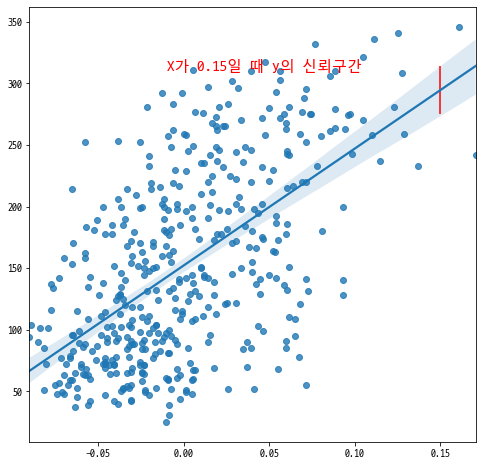

In [19]:
# 회귀직선의 신뢰대(각 X값에 대한 Y 평균값들의 신뢰구간) 시각화
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'D2Coding'

fig, ax = plt.subplots(1,1)
sns.regplot(x=X, y=Y, ax=ax)
ax.vlines(x=0.15, ymin=start3, ymax=end3, color='red')
ax.text(-0.01, 310, f"X가 {Xi}일 때 y의 신뢰구간", color='red', size=15)
plt.show()

### 8-1-2. 다중 선형 회귀

In [20]:
from sklearn.datasets import load_diabetes
import statsmodels.api as sm
import numpy as np
from pandas import DataFrame
data = load_diabetes() # 데이터 불러오기
Xa = data['data']
ya = data['target']
diabetes = DataFrame(np.c_[Xa, ya], columns = data['feature_names']+['target'])

# 다중 선형 회귀 적합을 위해 전체 데이터에서 4개의 설명변수와 1개의 종속변수를 추출
X = diabetes.filter(['bmi', 'age', 'sex', 'bp'])
y = diabetes.filter(['target'])

# 회귀 분석 fitted객체, 요약결과 반환하는 함수 정의
def multiR_fitted(X, y): #return fitted, summary
    X_ = sm.add_constant(X)
    model = sm.OLS(y, X_)
    fitted = model.fit()
    return fitted, fitted.summary()

fitted, summary = multiR_fitted(X, y)
print(summary)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     72.91
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           2.70e-47
Time:                        14:30:19   Log-Likelihood:                -2434.2
No. Observations:                 442   AIC:                             4878.
Df Residuals:                     437   BIC:                             4899.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.853     53.329      0.0

### - 영향치 판단

In [21]:
# 각 데이터의 영향치 판단값 계산
def get_influence(fitted):
    cook = fitted.get_influence().cooks_distance[0]
    dfb = fitted.get_influence().dfbetas[:,0]
    dff = fitted.get_influence().dffits_internal[0]
    lev = fitted.get_influence().hat_matrix_diag
    df = DataFrame({"cooks_distance":cook, 
                       'dfbetas':dfb, 'dffits':dff,
                      'leverageH':lev})
    return df

influ_df = get_influence(fitted)  
print(influ_df)

     cooks_distance   dfbetas    dffits  leverageH
0          0.001516 -0.043867 -0.087061   0.008908
1          0.000350 -0.024198 -0.041811   0.006743
2          0.001478 -0.033422 -0.085965   0.014950
3          0.003736  0.061662  0.136681   0.011133
4          0.000003 -0.002047 -0.003823   0.007869
..              ...       ...       ...        ...
437        0.000049 -0.008507 -0.015638   0.007629
438        0.000002 -0.001460 -0.003347   0.011865
439        0.000045 -0.008745 -0.015040   0.006677
440        0.000531  0.026808  0.051509   0.008339
441        0.000031 -0.005440 -0.012411   0.011747

[442 rows x 4 columns]


In [ ]:
# 영향치로 판단되는 데이터 추출하기
def find_idx_cooks(fitted):
    cook = fitted.get_influence().cooks_distance[0]
    P = fitted.get_influence().k_vars #변수의 개수
    score = 4 / (len(y) - P - 1)
    if score <= 1:
        idx = np.where(cook > score)[0]
    else:
        idx = np.where(cook > 1)[0]
    return idx

idx = find_idx_cooks(fitted) #영향치의 인덱스
print("Cook's distance 기준 영향치: ", idx)

Cook's distance 기준 영향치:  [  9  78  92 102 117 141 147 152 204 211 256 289 328 336 343 380 417]


In [ ]:
def find_idx_dfbetas(fitted):
    dfb = fitted.get_influence().dfbetas[:,0]
    n = fitted.df_resid + fitted.df_model + 1
    score = 2/np.sqrt(n)
    if score <= 2:
        idx = np.where(dfb > score)[0]
    else:
        idx = np.where(dfb > 2)[0]
    return idx
idx2 = find_idx_dfbetas(fitted)
print("DFBETAS 기준 영향치: ", idx2)

DFBETAS 기준 영향치:  [  9  37  78 102 141 152 190 218 359 364]


In [ ]:
def find_idx_dffits(fitted):
    dff = fitted.get_influence().dffits_internal[0]
    P = fitted.get_influence().k_vars
    n = fitted.df_resid + fitted.df_model + 1
    score = 2*np.sqrt((P+1)/n)
    idx = np.where(dff > score)[0]
    return idx
idx3 = find_idx_dffits(fitted)
print("DFFITS 기준 영향치: ", idx3)

DFFITS 기준 영향치:  [  9 102 117 141 256]


In [ ]:
def find_idx_leverageH(fitted):
    lh = fitted.get_influence().hat_matrix_diag
    P = fitted.get_influence().k_vars
    n = fitted.df_resid + fitted.df_model + 1
    score = 2*(P+1)/n
    idx = np.where(lh > score)[0]
    return idx
idx4 = find_idx_leverageH(fitted)
print("Leverage H 기준 영향치: ", idx4)

Leverage H 기준 영향치:  [130 145 256 261 340 366 367 408]


### - VIF 계산

In [22]:
from pandas import DataFrame
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

def check_vif(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    model.fit()
    vif_df = DataFrame(columns=['feature', 'VIF'])
    for i in range(1, len(model.exog_names)):
        vif_df.loc[i, 'feature'] = model.exog_names[i]
        vif_df.loc[i, 'VIF'] = round(VIF(model.exog, i), 3)
    return vif_df.sort_values('VIF', ascending=False)

print(check_vif(X, y))

## 모든 feature들의 VIF가 10 미만이기 때문에 다중공선성이 없다고 볼 수 있다.

  feature    VIF
4      bp  1.343
1     bmi   1.19
2     age  1.143
3     sex  1.073


### - 변수 선택과 가능도 

In [26]:
# 모든 변수를 포함한 full model
print("full model = const, bp, bmi, age, sex")
fitted, summary = multiR_fitted(X, y)
R2 = fitted.rsquared
n = fitted.nobs #number of observations
p = fitted.df_model #설명변수의 개수
constant = 'const' in fitted.params.keys() #절편 유무
SSE = sum((fitted.resid)**2) #full model의 잔차제곱합
MSE_full = SSE / (n-p-1) # fitted.mse_resid (MSE)
adj_R2 = 1- (1-R2)*(n-1)/(n-p-1)
print(" 수정 결정계수: {:.3f}".format(adj_R2))

#수기계산 및 라이브러리 계산
llf = -n/2*np.log(2*np.pi) - n/2*np.log(SSE / n) - n/2 #로그 가능도 값 (=fitted.llf)
aic = -2*llf + 2*(p + constant) #fitted.aic와 동일
bic = -2*llf + np.log(n)*(p + constant) #fitted.bic와 동일
print(" AIC: {:.1f}(= {:.1f})".format(aic, fitted.aic))
print(" BIC: {:.1f}(= {:.1f})".format(bic, fitted.bic))

cp = SSE/MSE_full - n + 2*(p+1)
print(" Cp {:.1f} -> 변수+상수 개수의 합 {}".format(cp, p+constant))

full model = const, bp, bmi, age, sex
 수정 결정계수: 0.395
 AIC: 4878.4(= 4878.4)
 BIC: 4898.8(= 4898.8)
 Cp 5.0 -> 변수+상수 개수의 합 5.0


In [28]:
# 일부 변수만 포함한 후보 model
print("후보 model = const, bp, bmi")
fitted2, summary2 = multiR_fitted(X.filter(['bp', 'bmi']), y)
n = fitted2.nobs #number of observations
p = fitted2.df_model #설명변수의 개수
constant = 'const' in fitted2.params.keys() #절편 유무
SSE2 = sum((fitted2.resid)**2) #후보 model의 잔차제곱합
adj_R2 = 1- (1-R2)*(n-1)/(n-p-1)
print(" 수정 결정계수: {:.3f}".format(adj_R2))

#수기계산 및 라이브러리 계산
llf = -n/2*np.log(2*np.pi) - n/2*np.log(SSE2 / n) - n/2 #로그 가능도 값
aic = -2*llf + 2*(p + constant)
bic = -2*llf + np.log(n)*(p + constant)
print(" AIC: {:.1f}(= {:.1f})".format(aic, fitted2.aic))
print(" BIC: {:.1f}(= {:.1f})".format(bic, fitted2.bic))

cp = SSE2/MSE_full - n + 2*(p+1) # 비교모델의 MSE가 아닌 위에서 구한 full모델의 MSE
print(" Cp {:.1f} -> 변수+상수 개수의 합 {}".format(cp, p+constant))

후보 model = const, bp, bmi
 수정 결정계수: 0.398
 AIC: 4877.5(= 4877.5)
 BIC: 4889.8(= 4889.8)
 Cp 4.1 -> 변수+상수 개수의 합 3.0


In [29]:
## 단계적 선택법
from pandas import DataFrame
import statsmodels.api as sm
from itertools import combinations
import numpy as np
def stepwise_method(X, y, criterion='AIC'): #'BIC', 'CP', 'adj_R2'
    result = DataFrame()
    feature_combis = [] #변수 조합의 모든 경우의 수
    for i in range(1, len(X.columns)+1):
        feature_combis += list(combinations(X.columns, i))
    feature_combis.reverse() #p개수 내림차순
    
    for j, feature_combi in enumerate(feature_combis):
        X_ = X.filter(feature_combi)
        X_ = sm.add_constant(X_) #절편 추가
        model = sm.OLS(y, X_)
        fitted = model.fit() #모델 적합
        n = fitted.nobs #number of observations
        p = fitted.df_model #설명변수의 개수
        if j==0:
            MSE_full = fitted.mse_resid # full모델의 MSE
        
        #각 기준값 계산
        aic = fitted.aic
        bic = fitted.bic
        cp = sum((fitted.resid)**2)/MSE_full - (n-2*(p+1))
        adj_R2 = fitted.rsquared_adj
        
        #각 기준값 입력
        result.loc[j, 'feature_combi'] = ", ".join(list(fitted.params.keys()))
        result.loc[j, 'AIC'] = aic
        result.loc[j, 'BIC'] = bic
        result.loc[j, 'CP'] = cp
        result.loc[j, 'adj_R2'] = adj_R2
        
        if criterion in ['AIC', 'BIC']: #낮을수록 Best
            result = result.sort_values(by=criterion, ascending = True)
            best = result.iloc[0, 0]
        elif criterion in ['adj_R2']: #높을수록 Best
            result = result.sort_values(by=criterion, ascending = False)
            best = result.iloc[0, 0]
        elif criterion in ['CP']: #CP값이 작고, 변수의 개수와 유사할수록 Best
            best_idx = np.abs(result['CP']-result['feature_combi'].apply(lambda x: x.count(',')+1)).sort_values(ascending=True).index
            result = result.loc[best_idx, :]
            best = result.iloc[0, 0]
        else:
            print("criterion options only cover AIC, BIC, CP, adj_R2.")
    return best, result

In [30]:
# AIC 기준으로 단계적 선택법을 통한 최적의 변수 선택 결과는 다음과 같다.
best, result = stepwise_method(X, y, criterion='AIC')
print("최적의 변수 조합: ", best)
print(f"전체 결과값: \n{result}\n")

for c in ['AIC', 'BIC', 'CP', 'adj_R2']:
    best, result = stepwise_method(X, y, c)
    print(f"기준 {c}에 의한 최적의 변수 조합 {best}")

최적의 변수 조합:  const, bmi, sex, bp
전체 결과값: 
               feature_combi          AIC          BIC          CP    adj_R2
2        const, bmi, sex, bp  4876.695411  4893.060650    3.337361  0.395687
8             const, bmi, bp  4877.487868  4889.761797    4.109107  0.393242
0   const, bmi, age, sex, bp  4878.354321  4898.810871    5.000000  0.394771
3        const, bmi, age, bp  4879.321065  4895.686305    5.943049  0.392087
10           const, bmi, age  4909.624337  4921.898267   37.300082  0.347484
4       const, bmi, age, sex  4911.296550  4927.661789   38.949213  0.346479
14                const, bmi  4912.038221  4920.220840   40.050212  0.342433
9            const, bmi, sex  4913.987529  4926.261459   41.995389  0.341010
5             const, sex, bp  5002.161858  5014.435788  147.526881  0.195519
11                 const, bp  5002.506590  5010.689210  148.630613  0.193078
1        const, age, sex, bp  5002.827282  5019.192522  147.767635  0.196113
6             const, age, bp  5003.

### - 잔차 분석

In [31]:
from scipy.stats import zscore, probplot
import statsmodels.api as sm
X_ = sm.add_constant(X)
model = sm.OLS(y, X_)
fitted = model.fit()
resid = fitted.resid # 잔차
pred = fitted.fittedvalues #예측값
sresid = zscore(resid) #표준화 잔차

print("예측값: \n", pred[:5].values)
print("실제값: \n", y[:5].values.ravel())
print("잔차: \n", resid[:5].values)
print("표준화 잔차: \n", sresid[:5])

예측값: 
 [205.82972979 105.33175612 182.53703825 129.17333187 137.56411038]
실제값: 
 [151.  75. 141. 206. 135.]
잔차: 
 [-54.82972979 -30.33175612 -41.53703825  76.82666813  -2.56411038]
표준화 잔차: 
 [-0.91941558 -0.50861985 -0.69651629  1.28827254 -0.04299644]


1. 정규성 가정 확인: 
 Jarque-bera: stats 6.464, p-value 0.039
 왜도 0.146, 첨도 2.485


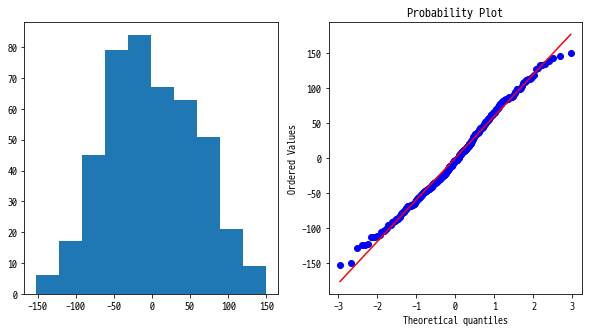

In [32]:
from matplotlib import pyplot as plt
from statsmodels.stats.stattools import jarque_bera
print("1. 정규성 가정 확인: ") #히스토그램, QQ plot, Jarque-Bera
stats, p, skew, kurt = jarque_bera(resid)
print(" Jarque-bera: stats {:.3f}, p-value {:.3f}".format(stats, p))
print(" 왜도 {:.3f}, 첨도 {:.3f}".format(skew, kurt))
## Jarque bera 검정 결과, 유의수준 0.05 기준으로 정규분포와 차이가 있다(H1).
## 정규분포는 왜도는 0, 첨도는 3을 따르는데 해당 기준으로는 다소 차이가 있다.

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(resid)
probplot(resid, plot=ax[1])
plt.show()
## 히스토그램과 QQ plot 상으로는 정규분포와 근접해 보인다.

2. 등분산성 가정 확인: 


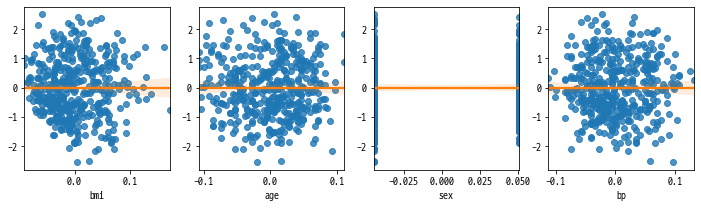

In [33]:
print("2. 등분산성 가정 확인: ")
import seaborn as sns
fig, ax = plt.subplots(1,4, figsize=(12,3))
for feature, ax in zip(X.columns, ax.ravel()):
    sns.regplot(x=X[feature], y=sresid, line_kws={'color':'C1'}, ax=ax)
plt.show()
## 각 독립변수와 잔차의 분산이 일정하면 가운데 회귀선이 수평하게 표시된다. 표준화 잔차의 값이 +/-2를 벗어나면 이상값 또는 특이값을 예상할 수 있다.
## 모든 독립변수에서 잔차의 분산이 일정한 것으로 보인다. 

In [34]:
print("3. 독립성 가정 확인: ")
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(resid)
print(" Durbin-watson 통계량 {:.3f}".format(dw))
## dw값이 2에 가까우면 잔차 간 독립이고, 0에 가까우면 양의 상관, 4에 가까우면 음의 상관이 있다고 본다. 따라서 잔차 간 독립인 것으로 보인다.

3. 독립성 가정 확인: 
 Durbin-watson 통계량 1.933


### 8-1-3. 규제 선형 회귀 

### - 릿지 회귀

In [35]:
# 앞서 불러온 데이터셋 사용
X = diabetes.filter(['bmi', 'age', 'sex', 'bp'])
y = diabetes.filter(['target'])

# 일반화 성능 확인을 위해 데이터를 train set과 test set으로 나눈다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [36]:
from sklearn.linear_model import Ridge
# alpha값이 커질수록 규제가 커져 모델의 복잡성이 낮아진다. (일반화 된다.)
a = 0.9
ridge = Ridge(alpha=a).fit(X_train, y_train)
print(f"[alpha = {a}]")
train_s = ridge.score(X_train, y_train)
test_s = ridge.score(X_test, y_test)
print(" train set score: {:.3f}, test set score: {:.3f}".format(train_s, test_s))
for i, coef in enumerate(ridge.coef_.ravel()):
    print(" 회귀계수 {}: {:.2f}".format(i, coef))
print(" 절편: {:.2f}".format(ridge.intercept_[0]))

[alpha = 0.9]
 train set score: 0.332, test set score: 0.263
 회귀계수 0: 401.53
 회귀계수 1: 93.50
 회귀계수 2: -36.41
 회귀계수 3: 238.75
 절편: 151.53


In [37]:
a = 0.1
print(f"[alpha = {a}]")
ridge = Ridge(alpha=a).fit(X_train, y_train)
train_s = ridge.score(X_train, y_train)
test_s = ridge.score(X_test, y_test)
print(" train set score: {:.3f}, test set score: {:.3f}".format(train_s, test_s))
for i, coef in enumerate(ridge.coef_.ravel()):
    print(" 회귀계수 {}: {:.2f}".format(i, coef))
print(" 절편: {:.2f}".format(ridge.intercept_[0]))

[alpha = 0.1]
 train set score: 0.418, test set score: 0.320
 회귀계수 0: 725.34
 회귀계수 1: 90.48
 회귀계수 2: -133.15
 회귀계수 3: 355.32
 절편: 151.64


### - 라쏘 회귀

In [ ]:
from sklearn.linear_model import Lasso
# alpha값이 커질수록 규제가 커져 모델의 복잡성이 낮아진다. (일반화 된다.)
a = 0.9
lasso = Lasso(alpha=a).fit(X_train, y_train)
print(f"[alpha = {a}]")
train_s = lasso.score(X_train, y_train)
test_s = lasso.score(X_test, y_test)
print(" train set score: {:.3f}, test set score: {:.3f}".format(train_s, test_s))
for i, coef in enumerate(lasso.coef_.ravel()):
    print(" 회귀계수 {}: {:.2f}".format(i, coef))
print(" 절편: {:.2f}".format(lasso.intercept_[0]))

[alpha = 0.9]
 train set score: 0.299, test set score: 0.319
 회귀계수 0: 482.02
 회귀계수 1: 0.00
 회귀계수 2: 0.00
 회귀계수 3: 124.41
 절편: 152.60


In [ ]:
a = 0.1
print(f"[alpha = {a}]")
lasso = Lasso(alpha=a).fit(X_train, y_train)
train_s = lasso.score(X_train, y_train)
test_s = lasso.score(X_test, y_test)
print(" train set score: {:.3f}, test set score: {:.3f}".format(train_s, test_s))
for i, coef in enumerate(lasso.coef_.ravel()):
    print(" 회귀계수 {}: {:.2f}".format(i, coef))
print(" 절편: {:.2f}".format(lasso.intercept_[0]))

[alpha = 0.1]
 train set score: 0.387, test set score: 0.417
 회귀계수 0: 741.19
 회귀계수 1: 4.47
 회귀계수 2: -0.00
 회귀계수 3: 374.56
 절편: 152.09


### - 엘라스틱넷

In [52]:
from sklearn.linear_model import ElasticNet
# alpha는 패널티 조건을 곱하는 상수로서 0이면 LinearRegression과 동일
# l1_ratio는 0~1 사이 값을 가지며, L1과 L2 규제의 조합을 의미함. 값이 0이면, L2 규제를 적용하고, 값이 1이면 L1 규제를 적용
a = 0.1
l1_ratio = 0.1
en = ElasticNet(alpha=a, l1_ratio=l1_ratio).fit(X_train, y_train)
print(f"[alpha = {a}, l1_ratio = {l1_ratio}]")
train_s = en.score(X_train, y_train)
test_s = en.score(X_test, y_test)
print(" train set score: {:.3f}, test set score: {:.3f}".format(train_s, test_s))
for i, coef in enumerate(en.coef_.ravel()):
    print(" 회귀계수 {}: {:.2f}".format(i, coef))
print(" 절편: {:.2f}".format(en.intercept_[0]))

[alpha = 0.1, l1_ratio = 0.1]
 train set score: 0.031, test set score: 0.023
 회귀계수 0: 25.03
 회귀계수 1: 9.17
 회귀계수 2: 0.86
 회귀계수 3: 17.62
 절편: 151.39


In [53]:
a = 0.1
l1_ratio = 0.9
print(f"[alpha = {a}, l1_ratio = {l1_ratio}]")
en = ElasticNet(alpha=a, l1_ratio=l1_ratio).fit(X_train, y_train)
train_s = en.score(X_train, y_train)
test_s = en.score(X_test, y_test)
print(" train set score: {:.3f}, test set score: {:.3f}".format(train_s, test_s))
for i, coef in enumerate(en.coef_.ravel()):
    print(" 회귀계수 {}: {:.2f}".format(i, coef))
print(" 절편: {:.2f}\n".format(en.intercept_[0]))

[alpha = 0.1, l1_ratio = 0.9]
 train set score: 0.178, test set score: 0.141
 회귀계수 0: 170.46
 회귀계수 1: 49.06
 회귀계수 2: -0.00
 회귀계수 3: 110.82
 절편: 151.44



### 8-1-4. 일반화 선형 회귀

### - 로지스틱 회귀

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from collections import Counter
from pandas import DataFrame
import numpy as np

# 데이터 불러오기
cancer = load_breast_cancer()
X = cancer.data[:, :4] # 유방암에 영향을 미치는 4개의 feature
X_names = cancer.feature_names[:4]
y = cancer.target # 유방암 여부
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
print("target class: ", Counter(y))

target class:  Counter({1: 357, 0: 212})


In [ ]:
# 로지스틱 회귀 적합
# 파라미터 C값이 높을수록 규제가 약해지고, 모델 복잡성이 높아진다. 
LR = LogisticRegression(C=0.01, max_iter=1000)
LR.fit(X_train, y_train)
train_score = LR.score(X_train, y_train)
test_score = LR.score(X_test, y_test)

# 회귀식을 반환하는 함수 정의
def regression_formula(feature_names, coef, intercept):
    msg = "y = "
    for i, feature in enumerate(feature_names):
        coef = coef.ravel()
        msg += "+ {:.3f}*'{}' ".format(coef[i], feature)
    if intercept.shape == (1,):
        intercept = intercept[0]
    else:
        intercept = intercept
    msg += "+ {:.3f}".format(intercept)
    msg = msg[:4] + msg[6:]
    return msg

print("train score {:.3f}, test score {:.3f}\n".format(train_score, test_score))
print("로지스틱 회귀식: \n", regression_formula(X_names, LR.coef_, LR.intercept_))

train score 0.913, test score 0.874

로지스틱 회귀식: 
 y = 0.016*'mean radius' + -0.192*'mean texture' + -0.272*'mean perimeter' + 0.008*'mean area' + 24.001


In [ ]:
# XBeta값(설명변수의 선형 결합)과 예측확률값(평균함수값) 구하기
data_idx = 0 #설명변수 X0의 index
XB = (X[data_idx]*LR.coef_).sum()+LR.intercept_[0] #회귀식에 X0값을 대입한 예측값
mu = 1/(1+np.exp(-XB)) #XB의 값을 변형하여 0~1 사이의 확률값으로 맵핑

# method인 decision_function과 predict_proba로 계산하기
XB2 = LR.decision_function(X[data_idx].reshape(-1,len(X[data_idx])))[0]
mu2 = LR.predict_proba(X[data_idx].reshape(-1,len(X[data_idx])))[0][1] 

print(" {}번 데이터의 features: {}".format(data_idx, X[data_idx]))
print(" {}번 데이터의 선형 함수 값 (XBeta): {:.3f} (={:.3f})".format(data_idx, XB, XB2))
print(" {}번 데이터의 시그모이드 함수 값 (mu): {:.3f} (={:.3f})".format(data_idx, mu, mu2) )

 0번 데이터의 features: [  17.99   10.38  122.8  1001.  ]
 0번 데이터의 선형 함수 값 (XBeta): -2.932 (=-2.932)
 0번 데이터의 시그모이드 함수 값 (mu): 0.051 (=0.051)


In [ ]:
#기본 cut-off value(임계값)는 0.5: 확률값이 0.5 이상이면 1, 이하이면 0으로 분류
prob = LR.predict_proba(X) #각 클래스에 대한 예측확률값
## predict_proba: mu 계산, decision_function: XBeta 계산
pred = LR.predict(X) # 예측값
result = DataFrame(prob)
result['pred'] = pred
result['y'] = y
print("각 클래스일 확률에 따른 예측분류값과 실제분류값:\n", result.head(4))

각 클래스일 확률에 따른 예측분류값과 실제분류값:
           0         1  pred  y
0  0.949417  0.050583     0  0
1  0.987738  0.012262     0  0
2  0.994990  0.005010     0  0
3  0.090167  0.909833     1  0


In [ ]:
# 회귀계수의 해석
feat_idx = 2 #확인할 feature의 index 선택
spec_X = X[data_idx]

# 회귀계수 확인
print("feature '{}'의 회귀계수 {:.3f}".format(X_names[feat_idx], LR.coef_[0][feat_idx]))
print(" ==> exp(회귀계수): {:.3f}\n".format(np.exp(LR.coef_[0][feat_idx])))

# 특정 feature의 값 한단위 증가 전 데이터와 오즈, 오즈비 확인
pred_y = LR.predict_proba(spec_X.reshape(-1,len(spec_X)))[0][1]
before_odds = pred_y/(1-pred_y)
print(" (증가 전) {}번 데이터의 features: {}".format(data_idx, spec_X))
print(" (증가 전)'{}'의 값이 {:.3f}일 때, y는 {:.3f}, odds(y/(1-y))는 {:.3f}\n".format(X_names[feat_idx], spec_X[feat_idx], pred_y, before_odds))

# 특정 feature의 값 한단위 증가 후 데이터와 오즈, 오즈비 확인
spec_X[feat_idx] = spec_X[feat_idx] +1
print(" (증가 후) {}번 데이터의 features: {}".format(data_idx, spec_X))
pred_y2 = LR.predict_proba(spec_X.reshape(-1,len(spec_X)))[0][1]
after_odds = pred_y2/(1-pred_y2)
print(" (증가 후)'{}'의 값이 {:.3f}일 때, y는 {:.3f},  odds(y/(1-y))는 {:.3f}(={:.3f})".format(X_names[feat_idx], spec_X[feat_idx], pred_y2, (pred_y2 / (1-pred_y2)), before_odds*np.exp(LR.coef_[0][feat_idx])))

print("\n ==> x가 한단위 증가하기 후의 오즈는 증가 전 오즈의 {:.3f}배가 된다. (증가 후 오즈/증가 전 오즈 = 오즈비)".format(after_odds/before_odds))

## x가 한단위 증가하면, 증가 후 오즈가 증가 전의 0.761배 된다는 의미이다. 이 0.761을 오즈비라고 한다.
## 즉, 해당 feature는 값이 증가할수록 반응변수의 확률값이 점점 줄어들게 된다.

feature 'mean perimeter'의 회귀계수 -0.272
 ==> exp(회귀계수): 0.761

 (증가 전) 0번 데이터의 features: [  17.99   10.38  122.8  1001.  ]
 (증가 전)'mean perimeter'의 값이 122.800일 때, y는 0.051, odds(y/(1-y))는 0.053

 (증가 후) 0번 데이터의 features: [  17.99   10.38  123.8  1001.  ]
 (증가 후)'mean perimeter'의 값이 123.800일 때, y는 0.039,  odds(y/(1-y))는 0.041(=0.041)

 ==> x가 한단위 증가하기 후의 오즈는 증가 전 오즈의 0.761배가 된다. (증가 후 오즈/증가 전 오즈 = 오즈비)


In [ ]:
# 분류 성능 최적화를 위해 cut-off value를 다르게 설정하기도 한다.
# Youden Index (Youden's J statistic)는 기본적으로 민감도 + 특이도 - 1이라는 매우 단순한 계산식을 통해 특이도와 민감도의 합이 최대가 되는 점을 구하는 방법이다. 이를 통해 최적의 cut-off value를 찾을 수 있다.
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, prob[:, 1]) #실제값과 예측 확률값으로 fpr, tpr, thresholds를 계산
J = tpr - fpr
idx= np.argmax(J)
best_threshold = thresholds[idx]
best_tpr = tpr[idx]
best_fpr = fpr[idx]
print("최적의 cut-off value: {:.3f}".format(best_threshold))
## 해당 모델은 최적의 cut-off value 0.526과 기본 설정값 0.5가 근사하지만, 어떤 경우 최적의 분류 결과를 위한 cut-off value가 0.5에서 많이 벗어난 값이 될 수도 있다. 

최적의 cut-off value: 0.526


In [ ]:
# statsmodels를 통해서도 회귀 적합할 수 있다. 다만, sklearn에서 적합한 회귀식과 다른 결과가 나오게 되는데, 그 이유는 sklearn에서 자동으로 규제(regularization)를 적용하고 있기 때문이다. sklearn의 C를 매우 큰 수로 설정하여 규제가 없다시피 하면, 두 라이브러리의 회귀식이 유사 해진다.
import statsmodels.api as sm
from scipy.stats import chi2
X_train = sm.add_constant(X_train)
model = sm.Logit(y_train, X_train)
fitted = model.fit()

# 로지스틱회귀 모델의 유의성 확인
test_a = 0.05 #유의수준
LLR = -2*(fitted.llnull - fitted.llf) #LLR (로그우도비)
cv = chi2.ppf(1-test_a, fitted.df_model) #LLR이 임계값보다 크면 모형이 유의하다.
sp = 1-chi2.cdf(LLR, fitted.df_model) #오른쪽 검정
print("\nLog-Likelihood: {:.3f}, LL-Null: {:.3f}".format(fitted.llf, fitted.llnull))
print("LLR: {:.3f}(= {:.3f}), critical value(임계값): {:.3f}".format(fitted.llr, LLR, cv))
print("LLR p-value: {:.3f}(= {:.3f})".format(sp, fitted.llr_pvalue))
print("R2: {:.3f}(= {:.3f})".format(fitted.prsquared, 1-fitted.llf/fitted.llnull))
## 해당 모델은 통계적으로 유의하다고 볼 수 있다.

Optimization terminated successfully.
         Current function value: 0.169550
         Iterations 10

Log-Likelihood: -72.229, LL-Null: -281.440
LLR: 418.423(= 418.423), critical value(임계값): 9.488
LLR p-value: 0.000(= 0.000)
R2: 0.743(= 0.743)


In [ ]:
# statsmodels의 요약 결과 확인
print(fitted.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  426
Model:                          Logit   Df Residuals:                      421
Method:                           MLE   Df Model:                            4
Date:                Thu, 01 Jun 2023   Pseudo R-squ.:                  0.7434
Time:                        12:43:03   Log-Likelihood:                -72.229
converged:                       True   LL-Null:                       -281.44
Covariance Type:            nonrobust   LLR p-value:                 2.906e-89
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1470      8.502      0.017      0.986     -16.516      16.810
x1            10.3953      2.119      4.906      0.000       6.243      14.548
x2            -0.2622      0.057     -4.577      0.0

In [ ]:
# x1의 회귀계수의 유의성 확인하기
# 위의 요약 결과에서는 회귀계수의 유의성 확인을 위해 z통계량을 사용하고 있으나, 아래와 같이 z통계량을 제곱한 wald통계량을 통해서도 회귀계수의 유의성을 확인할 수 있다.
z = (10.3953/2.119)
waldstat = z**2 #위의 report에서 확인한 x1의 회귀계수와 표준오차
cv = chi2.ppf(1-test_a, 1)
sp = 1-chi2.cdf(waldstat, 1)
print(f"Z 통계량 {z:.3f}")
print("wald 통계량 {:.3f}, 임곗값: {:.3f}".format(waldstat, cv))
print("유의수준 {:.3f}, 해당 통계량의 유의확률 {:.3f}".format(test_a, sp))
# 따라서 해당 회귀계수는 통계적으로 유의하다

Z 통계량 4.906
wald 통계량 24.066, 임곗값: 3.841
유의수준 0.050, 해당 통계량의 유의확률 0.000


### - 포아송 회귀

y의 분포: 


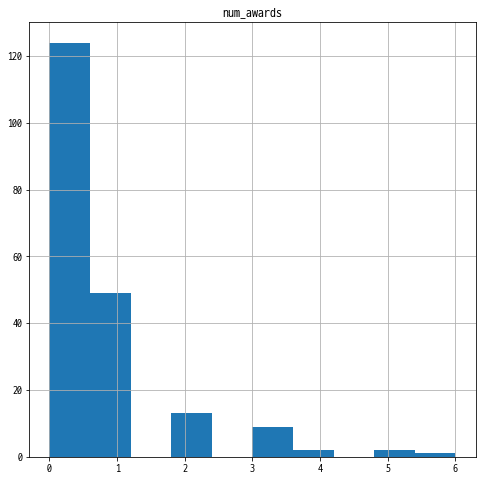

In [54]:
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split
from pandas import DataFrame, read_csv, get_dummies
from matplotlib import pyplot as plt
# [데이터 출처] https://stats.oarc.ucla.edu/r/dae/poisson-regression/

# 데이터 불러오기
# 종속변수인 'num_awards'가 정규분포가 아닌 포아송 분포를 따른다고 본다.
awards = read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/8-1-4_awards.csv')
X = awards.filter(['prog', 'math']) # 등록한 프로그램 타입, 기말고사 수학 성적
# 프로그램 타입: 1. general, 2. academic, 3. vocational
X = get_dummies(X, drop_first=True, columns=['prog'])
y = awards.filter(['num_awards']) # 한 고등학교에서 학생들이 받은 상의 개수
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("y의 분포: ")
y.hist()
plt.show()

In [ ]:
# 포아송 회귀 적합
# 파라미터 alpha가 커질수록 규제가 커지고, alpha가 0이면 규제가 없는 것과 같다. 
PR = PoissonRegressor(alpha=0.2)
PR.fit(X_train, y_train.values.ravel())
train_score = PR.score(X_train, y_train.values.ravel())
test_score = PR.score(X_test, y_test.values.ravel())

pred = PR.predict(X) # 예측값
result = DataFrame()
result['pred'] = pred
result['y'] = y

# 회귀식을 반환하는 함수 정의
def regression_formula(feature_names, coef, intercept):
    msg = "y = "
    for i, feature in enumerate(feature_names):
        coef = coef.ravel()
        msg += "+ {:.3f}*'{}' ".format(coef[i], feature)
    if intercept.shape == (1,):
        intercept = intercept[0]
    else:
        intercept = intercept
    msg += "+ {:.3f}".format(intercept)
    msg = msg[:4] + msg[6:]
    return msg

print("train score {:.3f}, test score {:.3f}\n".format(train_score, test_score))
print("포아송 회귀식: \n", regression_formula(X.columns, PR.coef_, PR.intercept_))

train score 0.327, test score 0.301

포아송 회귀식: 
 y = 0.078*'math' + 0.311*'prog_2' + -0.119*'prog_3' + -5.053


In [ ]:
# XBeta값(설명변수의 선형 결합)과 지수 함수값(평균함수값) 구하기
data_idx = 194
XB = (X.iloc[data_idx, :]*PR.coef_).sum()+PR.intercept_ #회귀식에 x값을 대입한 값
mu = PR.predict(X.iloc[data_idx, :].values.reshape(-1,len(X.columns)))[0]
mu2 = np.exp(XB)

print(" {}번 데이터의 features: {}".format(data_idx, X.iloc[data_idx, :].values))
print(" {}번 데이터의 선형 함수 값 (XBeta): {:.3f}".format(data_idx, XB))
print(" {}번 데이터의 지수 함수 값 (mu): {:.3f} (={:.3f})".format(data_idx, mu, mu2) )

 194번 데이터의 features: [60  1  0]
 194번 데이터의 선형 함수 값 (XBeta): -0.052
 194번 데이터의 지수 함수 값 (mu): 0.949 (=0.949)


In [ ]:
pred = PR.predict(X)
result = DataFrame()
result['pred'] = pred
result['Xbeta'] = np.log(pred)
result['y'] = y
print("예측빈도값과 실제빈도값:\n", result.tail(6))
## 모델 자체의 성능이 좋지 못한 상황이지만, 198번 데이터를 제외한 나머지 데이터들은 실제값에 근사하게 예측해냈다.

예측빈도값과 실제빈도값:
          pred     Xbeta  y
194  0.949226 -0.052109  1
195  2.242673  0.807668  2
196  1.995194  0.690741  2
197  2.242673  0.807668  1
198  2.424996  0.885830  0
199  2.622142  0.963992  3


In [ ]:
# 회귀계수의 해석
feat_idx = 0
spec_X = X.iloc[data_idx, :].values

# 회귀계수 확인
print("feature '{}'의 회귀계수 {:.3f}: ".format(X.columns[feat_idx], PR.coef_[feat_idx]))
print(" ==> exp(회귀계수): {:.3f}\n".format(np.exp(PR.coef_[feat_idx])))

# 특정 feature의 한단위 증가 전 데이터와 예측값 y 확인
before_pred = PR.predict(spec_X.reshape(-1, len(spec_X)))[0]
print(" (증가 전) {}번 데이터의 features: {}".format(data_idx, spec_X))
print(" (증가 전)'{}'의 값이 {:.3f}일 때, y는 {:.3f}".format(X.columns[feat_idx], spec_X[feat_idx], before_pred))

# 특정 feature의 한단위 증가 후 데이터와 예측값 y 확인
spec_X[feat_idx] = spec_X[feat_idx] +1
after_pred = PR.predict(spec_X.reshape(-1,len(spec_X)))[0]
print(" (증가 후) {}번 데이터의 features: {}".format(data_idx, spec_X))
print(" (증가 후)'{}'의 값이 {:.3f}일 때, y는 {:.3f}".format(X.columns[feat_idx], spec_X[feat_idx], after_pred))

print("\n ==> x가 한단위 증가한 후의 빈도수는 증가 전 빈도수의 {:.3f}배가 된다. (= 증가 후 빈도수 / 증가 전 빈도수)".format(after_pred/before_pred))

## x가 한단위 증가하면, 증가 후 빈도수가 증가 전의 1.081배 된다는 의미이다.
## 즉, 해당 feature는 값이 증가할수록 반응변수의 확률값이 점점 증가하게 된다.

feature 'math'의 회귀계수 0.078: 
 ==> exp(회귀계수): 1.081

 (증가 전) 194번 데이터의 features: [60  1  0]
 (증가 전)'math'의 값이 60.000일 때, y는 0.949
 (증가 후) 194번 데이터의 features: [61  1  0]
 (증가 후)'math'의 값이 61.000일 때, y는 1.026

 ==> x가 한단위 증가한 후의 빈도수는 증가 전 빈도수의 1.081배가 된다. (= 증가 후 빈도수 / 증가 전 빈도수)


In [ ]:
# statsmodels를 통해서도 회귀 적합할 수 있다. 다만, sklearn에서 적합한 회귀식과 다른 결과가 나오게 되는데, sklearn에서 자동으로 규제를 적용하고 있기 때문이다. sklearn의 alpha를 0으로 설정하여 규제가 없다시피 하면, 두 라이브러리의 회귀식이 유사 해진다.
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.GLM(y_train, X_train, family=sm.families.Poisson())
fitted = model.fit()
test_a = 0.05
cv = chi2.ppf(1-test_a, fitted.df_resid) #오른쪽 검정
print("critical value: {:.3f}".format(cv))

critical value: 175.198


In [ ]:
# 포아송회귀 모델의 유의성 확인
# Pearson chi2 통계량 계산 (자유도가 n-k-1인 카이제곱분포를 따름)
pearson = DataFrame(y_train)
pearson['pred'] = fitted.fittedvalues
pearson['squared_gap'] = (pearson['num_awards'] - pearson['pred'])**2
pearson['squared_gap/pred'] = pearson['squared_gap']/pearson['pred']
pstats = pearson['squared_gap/pred'].sum()
pval = 1-chi2.cdf(pstats, fitted.df_resid)
print("pearson chi2 stats: {:.3f}(={:.3f}), p-value: {:.3f}".format(pstats, fitted.pearson_chi2, pval))

pearson chi2 stats: 163.211(=163.211), p-value: 0.157


In [ ]:
# deviance 통계량 계산 (자유도가 n-k-1인 카이제곱분포를 따름)
deviance = DataFrame(y_train['num_awards'])
deviance['pred'] = fitted.fittedvalues
deviance['Log'] = np.log(deviance['num_awards']/deviance['pred'])*deviance['num_awards']
deviance['num-pred'] = deviance['num_awards'] - deviance['pred']
dstats = deviance['Log'].sum()*2 - deviance['num-pred'].sum()*2
pval2 = (1-chi2.cdf(dstats, fitted.df_resid))**2
print("deviance chi2 stats: {:.3f}, p-value: {:.3f}".format(dstats, pval2))
print("R2: {:.3f}".format(1-fitted.llf/fitted.llnull))
## 따라서 해당 모델은 Pearson chi2 및 deviance 검정 결과, 귀무가설을 기각할 수 없으므로 통계적으로 유의하다.

deviance chi2 stats: 140.625, p-value: 0.372
R2: 0.224


In [ ]:
# statsmodels의 요약 결과 확인
print(fitted.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             num_awards   No. Observations:                  150
Model:                            GLM   Df Residuals:                      146
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -136.21
Date:                Thu, 01 Jun 2023   Deviance:                       140.62
Time:                        13:23:27   Pearson chi2:                     163.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2428      0.777     -6.748      0.0

In [ ]:
# math의 회귀계수의 유의성 확인하기
# 위의 요약 결과에서는 회귀계수의 유의성 확인을 위해 z통계량을 사용하고 있으나, 아래와 같이 z통계량을 제곱한 wald통계량을 통해서도 회귀계수의 유의성을 확인할 수 있다.
z = (0.0673/0.012)
waldstat = z**2 #위의 report에서 확인한 math의 회귀계수와 표준오차
cv = chi2.ppf(1-test_a, 1)
sp = 1-chi2.cdf(waldstat, 1)
print(f"Z 통계량 {z:.3f}")
print("wald 통계량 {:.3f}, 임곗값: {:.3f}".format(waldstat, cv))
print("유의수준 {:.3f}, 해당 통계량의 유의확률 {:.3f}".format(test_a, sp))
# 따라서 해당 회귀계수는 통계적으로 유의하다

Z 통계량 5.608
wald 통계량 31.453, 임곗값: 3.841
유의수준 0.050, 해당 통계량의 유의확률 0.000


### 8-1-5. 아웃라이어에 강한 선형 회귀

### - Robust regression

In [4]:
from sklearn.linear_model import HuberRegressor
import numpy as np
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression
rng = np.random.RandomState(0)
## 이상치 포함하는 데이터 생성하기
# 1개의 feature를 가진 사이즈 30의 데이터 생성
X, y =  make_regression(n_samples=30, n_features=1, random_state=0, noise=4.0, bias=100.0)

# 4개의 outlier를 생성하여 데이터에 추가
X_outliers = rng.normal(0, 0.5, size=(4, 1))
y_outliers = rng.normal(0, 2.0, size=4)
X_outliers[:2, :] += X.max() + X.mean() #outlier의 반은 더 크게
X_outliers[2:, :] += X.min() - X.mean() #outlier의 반은 더 작게
y_outliers[:2] += y.min() - y.mean()
y_outliers[2:] += y.max() + y.mean()
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))

In [5]:
# Robust regression 적합
HR = HuberRegressor(epsilon=1).fit(X, y)
HR_pred = HR.predict(X)
print("Huber coefficients {}, score {:.3f}".format(HR.coef_, HR.score(X, y)))

# 선형회귀 적합
LR = LinearRegression().fit(X, y)
LR_pred = LR.predict(X)
print("Linear coefficients {}, score {:.3f}".format(LR.coef_, LR.score(X, y)))

Huber coefficients [94.20831622], score -0.820
Linear coefficients [-10.91352281], score 0.009


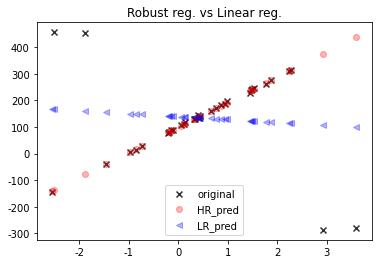

In [6]:
# 실제값과 두 회귀의 예측값을 비교
from matplotlib import pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1,1)
ax.set_title("Robust reg. vs Linear reg.")
ax.scatter(X, y, color = 'black', alpha=0.8, marker='x')
ax.scatter(X, HR_pred, color='red', alpha=0.3, marker='o')
ax.scatter(X, LR_pred, color='blue', alpha=0.3, marker='<')
plt.legend(['original', 'HR_pred', 'LR_pred'])
plt.show()

## Huber regression(Robust)이 Linear regression보다 이상치에 민감하지 않고 (강건하게) 일반적인 데이터를 잘 설명하도록 적합한 것으로 나타났다.

### - Quantile regression

In [7]:
from sklearn.linear_model import QuantileRegressor
# QuantileRegressor 적합
QR = QuantileRegressor(alpha=0).fit(X, y)
QR_pred = QR.predict(X)
print("Quantile coefficients {}, score {:.3f}".format(QR.coef_, QR.score(X, y)))
# 선형회귀 적합
LR = LinearRegression().fit(X, y)
LR_pred = LR.predict(X)
print("Linear coefficients {}, score {:.3f}".format(LR.coef_, LR.score(X, y)))

Quantile coefficients [94.20835266], score -0.820
Linear coefficients [-10.91352281], score 0.009


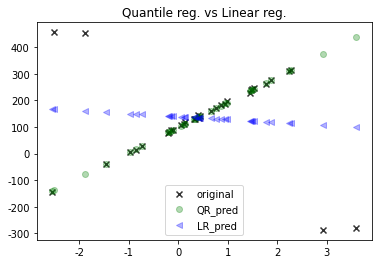

In [8]:
fig, ax = plt.subplots(1,1)
ax.set_title("Quantile reg. vs Linear reg.")
ax.scatter(X, y, color = 'black', alpha=0.8, marker='x')
ax.scatter(X, QR_pred, color='green', alpha=0.3, marker='o')
ax.scatter(X, LR_pred, color='blue', alpha=0.3, marker='<')
plt.legend(['original', 'QR_pred', 'LR_pred'])
plt.show()

## 8-2. 비선형 회귀

### - 다항 회귀

sklearn R2: 0.906


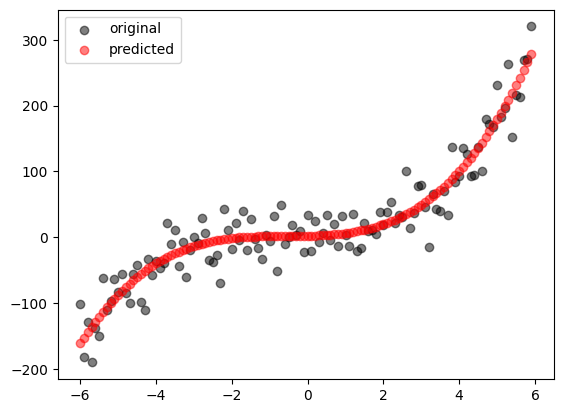

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     373.5
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           2.04e-59
Time:                        04:51:06   Log-Likelihood:                -571.53
No. Observations:                 120   AIC:                             1151.
Df Residuals:                     116   BIC:                             1162.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1848      3.946      0.554      0.5

In [2]:
# 데이터 생성
from pandas import DataFrame
import numpy as np
x = np.arange(-6.0, 6.0, 0.1)
y = 1*(x**3) + 2*(x**2) + 1*x + 3
y_noise = 30 * np.random.normal(size=x.size)
y = y + y_noise

# 다항 회귀 적합 1 (w/ sklearn)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#degree: 다항식 차수 지정
#include_bias: 절편 추가여부

poly_features = PolynomialFeatures(degree=3, include_bias=True)
px = poly_features.fit_transform(x.reshape(-1,1))

LR = LinearRegression()
LR.fit(px, y)
pred = LR.predict(px)
print("sklearn R2: {:.3f}".format(LR.score(px, y)))

# 원본 데이터와 예측 데이터 비교
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,1)
ax.scatter(x, y, alpha=0.5, color='black')
ax.scatter(x, pred, alpha=0.5, color='red')
ax.legend(['original', 'predicted'])
plt.show()

# 다항 회귀 적합 2 (w/ statsmodels)
import statsmodels.api as sm
model = sm.OLS(y, px) #sklearn의 PolynomialFeatures로 변환한 feature를 사용
fitted = model.fit()
print(fitted.summary())

### - 스플라인 회귀

sklearn R2: 0.907


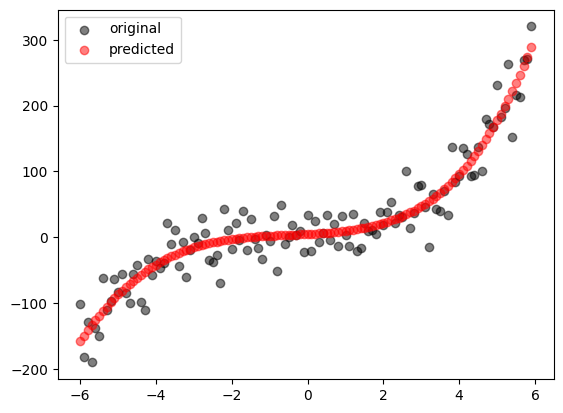

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     222.5
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           4.50e-57
Time:                        04:52:59   Log-Likelihood:                -570.97
No. Observations:                 120   AIC:                             1154.
Df Residuals:                     114   BIC:                             1171.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -664.6339    172.895     -3.844      0.0

In [4]:
# 앞선 데이터를 동일하게 사용
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression

# 스플라인 회귀 적합 1 (w/ sklearn)
spline = SplineTransformer(degree=3, n_knots=4)
sx = spline.fit_transform(x.reshape(-1,1))

LR = LinearRegression()
LR.fit(sx, y)
pred = LR.predict(sx)
print("sklearn R2: {:.3f}".format(LR.score(sx, y)))

# 원본 데이터와 예측 데이터 비교
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,1)
ax.scatter(x, y, alpha=0.5, color='black')
ax.scatter(x, pred, alpha=0.5, color='red')
ax.legend(['original', 'predicted'])
plt.show()

# 스플라인 회귀 적합 2 (w/ statsmodels)
import statsmodels.api as sm
model = sm.OLS(y, sx) #sklearn의 SplineTransformer로 변환한 feature를 사용
fitted = model.fit()
print(fitted.summary())

# 연습문제
### - 1번 문제 풀이

In [357]:
from pandas import read_csv, concat, get_dummies
realestate = read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice8_BHP2.csv')
print(realestate)

     area_type  availability  size  total_sqft  bath  balcony   price
0        Super             0     3      1056.0     2        1   39.07
1         Plot             1     6      2600.0     5        3  120.00
2        Super             1     5      1521.0     3        1   95.00
3        Super             1     3      1170.0     2        1   38.00
4         Plot             1     6      2785.0     5        3  295.00
...        ...           ...   ...         ...   ...      ...     ...
7490     Super             1     5      1345.0     2        1   57.00
7491     Super             1     5      1715.0     3        3  112.00
7492  Built-up             1     8      3453.0     4        0  231.00
7493  Built-up             1     3      1141.0     2        1   60.00
7494     Super             0     7      4689.0     4        1  488.00

[7495 rows x 7 columns]


In [311]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# feature에서 범주형 변수를 더미코딩하고, 상수항을 추가한 후, 데이터를 train/test set으로 분할
X = get_dummies(realestate.drop('price', axis=1), columns=['area_type'], drop_first=True)
X = sm.add_constant(X)
y = realestate['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

# 현재 데이터로 선형회귀 분석을 수행
model1 = sm.OLS(y_train, X_train)
fitted1 = model1.fit()
print(fitted1.summary()) # 적합한 선형회귀 모델 결과를 확인

# 적합한 모델로 test set을 예측하여 결정계수를 확인
pred1 = fitted1.predict(X_test)
print(">>> test score {:.3f}".format(r2_score(y_test, pred1)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     656.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:11:31   Log-Likelihood:                -32305.
No. Observations:                5621   AIC:                         6.463e+04
Df Residuals:                    5612   BIC:                         6.469e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -62.1571      4.615  

### - 2번 문제 풀이

In [313]:
# area_type과 total_sqft의 교호작용항을 추가한 X_train2, X_test2 생성
X_train2, X_test2 = X_train.copy(), X_test.copy()
for col in ['area_type_Carpet', 'area_type_Plot', 'area_type_Super']:
    X_train2[f"at_{col[10:]}:total_sqft"] = X_train[col] * X_train['total_sqft']
    X_test2[f"at_{col[10:]}:total_sqft"] = X_test[col] * X_test['total_sqft']

# 신규 feature를 생성한 데이터로 선형회귀 분석을 수행
model2 = sm.OLS(y_train, X_train2)
fitted2 = model2.fit()
print(fitted2.summary()) # 적합한 선형회귀 모델 결과를 확인

# 적합한 모델로 test set을 예측하여 결정계수를 확인
pred2 = fitted2.predict(X_test2)
print(">>> test score {:.3f}".format(r2_score(y_test, pred2)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     556.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:14:19   Log-Likelihood:                -32088.
No. Observations:                5621   AIC:                         6.420e+04
Df Residuals:                    5609   BIC:                         6.428e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -28.2105 

### - 3번 문제 풀이

In [323]:
# total_sqft의 이차항을 추가한 X_train3, X_test3 생성
X_train3, X_test3 = X_train2.copy(), X_test2.copy()
X_train3["total_sqft2"] = X_train2['total_sqft']**2
X_test3["total_sqft2"] = X_test2['total_sqft']**2

# 신규 feature를 생성한 데이터로 선형회귀 분석을 수행
model3 = sm.OLS(y_train, X_train3)
fitted3 = model3.fit()
print(fitted3.summary()) # 적합한 선형회귀 모델 결과를 확인

# 적합한 모델로 test set을 예측하여 결정계수를 확인
pred3 = fitted3.predict(X_test3)
print(">>> test score {:.3f}".format(r2_score(y_test, pred3)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     847.8
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:22:18   Log-Likelihood:                -31254.
No. Observations:                5621   AIC:                         6.253e+04
Df Residuals:                    5608   BIC:                         6.262e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -40.6111 

### - 4번 문제 풀이

In [356]:
# Cook's distance, DFBETAS, DFFITS, LeverageH 등 영향치 기준으로 데이터를 판단하여 영향치를 제거하거나, VIF를 통해 다중공선성이 있는 변수를 제거하거나, AIC를 최소로하는 변수의 조합을 찾는 단계적 선택법으로 변수를 선택할 수 있다. 여기에서는 통계적으로 유의하지 않은 변수들을 제거함으로써 최종 변수를 선택하고자 한다.

X_train4, X_test4 = X_train3.copy(), X_test3.copy()

# 회귀계수 분석을 위해 feature scaling 진행
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train4)
X_train4 = DataFrame(ss.transform(X_train4), columns=X_train4.columns)
X_test4 = DataFrame(ss.transform(X_test4), columns=X_test4.columns)
X_train4['const'] = 1
X_test4['const'] = 1

# 통계적으로 유의하지 않은 변수들 제거
del_feats = ['bath', 'at_Plot:total_sqft', 'availability']
X_train4 = X_train4.drop(del_feats, axis=1)
X_test4 = X_test4.drop(del_feats, axis=1)

# 신규 feature를 생성한 데이터로 선형회귀 분석을 수행
model4 = sm.OLS(y_train.values, X_train4)
fitted4 = model4.fit()
print(fitted4.summary()) # 적합한 선형회귀 모델 결과를 확인

# 적합한 모델로 test set을 예측하여 결정계수를 확인
pred4 = fitted4.predict(X_test4)
print(">>> test score {:.3f}".format(r2_score(y_test, pred4)))

# train score(R-squared) 0.644와 test score 0.726에 의하면, 해당 모델은 데이터에 대한 설명력이 있다고 볼 수 있으며, train/test set 성능 차이가 크지 않기 때문에 어느 정도 일반화된 모델이라고 볼 수 있다. 
# 모델의 통계적 유의성은 F-statistic으로 확인할 수 있는데 해당 통계량의 p-value(Prob)가 유의수준 0.05보다 작기 때문에 모델은 통계적으로 유의하다고 볼 수 있다.
# 각 변수에 대한 회귀계수들의 t통계량에 따른 p-value가 모두 유의수준보다 작기 때문에 이 회귀계수들 역시 통계적으로 유의하다고 볼 수 있다.
# 또한, 잔차분석을 통해 회귀모형에 대한 가정인 정규성, 등분산성, 독립성을 만족하는지를 확인해야 한다. 아래에서 Durbin-Watson 통계량이 2에 가까움으로써 독립성은 만족하고 있지만, Jarque-Bera 통계량의 p-value를 볼 때 유의수준보다 작기 때문에 정규성에 위배된다. 이처럼 모델이 회귀모형의 가정을 충족하지 못하는 경우, 추가로 자료를 수집하거나 변수 변환의 방법을 통해 가정을 충족하도록 모델을 다시 생성해야 한다.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     1128.
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:59:52   Log-Likelihood:                -31259.
No. Observations:                5621   AIC:                         6.254e+04
Df Residuals:                    5611   BIC:                         6.260e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   97.2994 